Step 1: Generate Dataset Following the Equation


✓ Dataset generated and saved!
Shape: (500, 2)

First 5 rows:
           x            y
0 -10.000000 -5703.164292
1  -9.959920 -5669.273317
2  -9.919840 -5564.838262
3  -9.879760 -5456.434335
4  -9.839679 -5480.155256


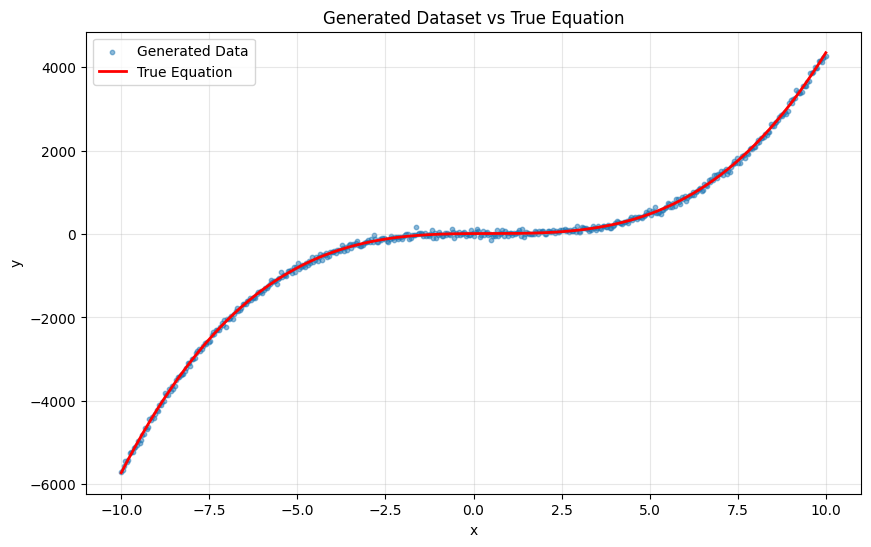

In [1]:
# Step 1: Generate Dataset that follows y = 5x^3 - 7x^2 + 4x + 12
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate x values
x_values = np.linspace(-10, 10, 500)

# True equation: y = 5x^3 - 7x^2 + 4x + 12
def true_equation(x):
    return 5*x**3 - 7*x**2 + 4*x + 12

# Generate y values with noise to simulate real-world data
noise_level = 50
y_values = true_equation(x_values) + np.random.normal(0, noise_level, len(x_values))

# Create DataFrame
dataset = pd.DataFrame({
    'x': x_values,
    'y': y_values
})

# Save to CSV
dataset.to_csv('polynomial_dataset.csv', index=False)

print("✓ Dataset generated and saved!")
print(f"Shape: {dataset.shape}")
print(f"\nFirst 5 rows:\n{dataset.head()}")

# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.5, s=10, label='Generated Data')
plt.plot(x_values, true_equation(x_values), 'r-', linewidth=2, label='True Equation')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Dataset vs True Equation')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Step 2: Load Dataset and Prepare Data

In [2]:
# Step 2: Load the CSV file and prepare data
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('polynomial_dataset.csv')

print("✓ Dataset loaded successfully!")
print(f"Shape: {df.shape}\n")

# Prepare data for neural network
X = df['x'].values.reshape(-1, 1)
y = df['y'].values.reshape(-1, 1)

# Normalize data for better neural network training
X_mean, X_std = X.mean(), X.std()
y_mean, y_std = y.mean(), y.std()

X_normalized = (X - X_mean) / X_std
y_normalized = (y - y_mean) / y_std

# Split into training and testing sets (80-20 split)
split_idx = int(0.8 * len(X))
X_train = X_normalized[:split_idx]
y_train = y_normalized[:split_idx]
X_test = X_normalized[split_idx:]
y_test = y_normalized[split_idx:]

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"\nNormalization parameters:")
print(f"  X: mean={X_mean:.4f}, std={X_std:.4f}")
print(f"  y: mean={y_mean:.4f}, std={y_std:.4f}")


✓ Dataset loaded successfully!
Shape: (500, 2)

Training set: 400 samples
Testing set: 100 samples

Normalization parameters:
  X: mean=-0.0000, std=5.7851
  y: mean=-221.9266, std=1935.7265


## Step 3: Build Neural Network from Scratch

In [3]:
# Step 3: Neural Network Implementation from Scratch

class NeuralNetworkFromScratch:
    """
    Fully configurable neural network built from scratch.
    Implements forward propagation, backpropagation, and gradient descent.
    """
    
    def __init__(self, layer_sizes, learning_rate=0.001, random_seed=42):
        """
        Initialize neural network.
        
        Parameters:
        -----------
        layer_sizes : list of int
            Number of neurons in each layer. Example: [1, 64, 32, 16, 1]
            means Input(1) -> Hidden(64) -> Hidden(32) -> Hidden(16) -> Output(1)
        learning_rate : float
            Learning rate for gradient descent
        random_seed : int
            For reproducibility
        """
        np.random.seed(random_seed)
        
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.num_layers = len(layer_sizes)
        
        # Initialize weights and biases using He initialization
        self.weights = []
        self.biases = []
        
        for i in range(len(layer_sizes) - 1):
            # He initialization for better convergence with ReLU
            w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * np.sqrt(2.0 / layer_sizes[i])
            b = np.zeros((1, layer_sizes[i+1]))
            
            self.weights.append(w)
            self.biases.append(b)
        
        # Storage for forward pass (needed for backpropagation)
        self.activations = []
        self.z_values = []
        
        print(f"✓ Neural Network Initialized!")
        print(f"  Architecture: {layer_sizes}")
        print(f"  Total parameters: {self.count_parameters()}")
    
    def count_parameters(self):
        """Count total trainable parameters"""
        return sum(w.size + b.size for w, b in zip(self.weights, self.biases))
    
    def relu(self, z):
        """ReLU activation: max(0, z)"""
        return np.maximum(0, z)
    
    def relu_derivative(self, z):
        """Derivative of ReLU"""
        return (z > 0).astype(float)
    
    def forward(self, X):
        """
        Forward propagation through the network.
        
        Parameters:
        -----------
        X : ndarray
            Input data (batch_size, input_features)
        
        Returns:
        --------
        ndarray : Network predictions
        """
        self.activations = [X]
        self.z_values = []
        
        current_activation = X
        
        # Pass through all layers
        for i in range(len(self.weights)):
            # Linear transformation: z = Wx + b
            z = np.dot(current_activation, self.weights[i]) + self.biases[i]
            self.z_values.append(z)
            
            # Apply activation function
            if i < len(self.weights) - 1:
                # Hidden layers: ReLU activation
                current_activation = self.relu(z)
            else:
                # Output layer: Linear activation (for regression)
                current_activation = z
            
            self.activations.append(current_activation)
        
        return current_activation
    
    def backward(self, X, y):
        """
        Backpropagation to compute gradients.
        
        Uses chain rule to compute gradients of loss w.r.t. weights and biases.
        """
        m = X.shape[0]  # Batch size
        
        # Initialize gradient storage
        weight_gradients = [np.zeros_like(w) for w in self.weights]
        bias_gradients = [np.zeros_like(b) for b in self.biases]
        
        # Output layer error (MSE loss derivative)
        delta = 2 * (self.activations[-1] - y) / m
        
        # Backpropagate through layers (reverse order)
        for i in range(len(self.weights) - 1, -1, -1):
            # Compute gradients
            weight_gradients[i] = np.dot(self.activations[i].T, delta)
            bias_gradients[i] = np.sum(delta, axis=0, keepdims=True)
            
            if i > 0:
                # Propagate error to previous layer
                delta = np.dot(delta, self.weights[i].T)
                # Apply activation derivative
                delta *= self.relu_derivative(self.z_values[i-1])
        
        return weight_gradients, bias_gradients
    
    def update_parameters(self, weight_gradients, bias_gradients):
        """Update weights and biases using gradient descent"""
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * weight_gradients[i]
            self.biases[i] -= self.learning_rate * bias_gradients[i]
    
    def compute_loss(self, y_true, y_pred):
        """Mean Squared Error loss"""
        return np.mean((y_true - y_pred) ** 2)
    
    def train(self, X_train, y_train, X_val, y_val, epochs=1000, batch_size=32, verbose=True):
        """
        Train the neural network using mini-batch gradient descent.
        """
        train_losses = []
        val_losses = []
        
        n_samples = X_train.shape[0]
        n_batches = n_samples // batch_size
        
        for epoch in range(epochs):
            # Shuffle training data each epoch
            indices = np.random.permutation(n_samples)
            X_shuffled = X_train[indices]
            y_shuffled = y_train[indices]
            
            # Mini-batch training
            for batch in range(n_batches):
                start_idx = batch * batch_size
                end_idx = start_idx + batch_size
                
                X_batch = X_shuffled[start_idx:end_idx]
                y_batch = y_shuffled[start_idx:end_idx]
                
                # Forward pass
                y_pred = self.forward(X_batch)
                
                # Backward pass (compute gradients)
                weight_grads, bias_grads = self.backward(X_batch, y_batch)
                
                # Update parameters
                self.update_parameters(weight_grads, bias_grads)
            
            # Compute epoch losses
            train_pred = self.forward(X_train)
            train_loss = self.compute_loss(y_train, train_pred)
            train_losses.append(train_loss)
            
            val_pred = self.forward(X_val)
            val_loss = self.compute_loss(y_val, val_pred)
            val_losses.append(val_loss)
            
            # Print progress
            if verbose and (epoch % 200 == 0 or epoch == epochs - 1):
                print(f"Epoch {epoch:4d}/{epochs} - Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}")
        
        return train_losses, val_losses
    
    def predict(self, X):
        """Make predictions"""
        return self.forward(X)

print("✓ Neural Network class defined successfully!")


✓ Neural Network class defined successfully!


## Step 4: Train Neural Network from Scratch

TRAINING NEURAL NETWORK FROM SCRATCH

Configuration:
  Layer architecture: [1, 64, 32, 16, 1]
  Learning rate: 0.001
  Epochs: 2000
  Batch size: 32

✓ Neural Network Initialized!
  Architecture: [1, 64, 32, 16, 1]
  Total parameters: 2753

Training started...

Epoch    0/2000 - Train Loss: 0.267405, Val Loss: 4.084611
Epoch  200/2000 - Train Loss: 0.061272, Val Loss: 1.249788
Epoch  400/2000 - Train Loss: 0.038644, Val Loss: 1.033488
Epoch  600/2000 - Train Loss: 0.022506, Val Loss: 0.896123
Epoch  800/2000 - Train Loss: 0.014281, Val Loss: 0.799821
Epoch 1000/2000 - Train Loss: 0.009443, Val Loss: 0.742145
Epoch 1200/2000 - Train Loss: 0.006660, Val Loss: 0.719721
Epoch 1400/2000 - Train Loss: 0.004867, Val Loss: 0.704096
Epoch 1600/2000 - Train Loss: 0.003751, Val Loss: 0.684891
Epoch 1800/2000 - Train Loss: 0.003093, Val Loss: 0.670239
Epoch 1999/2000 - Train Loss: 0.002622, Val Loss: 0.654867

✓ Training completed!



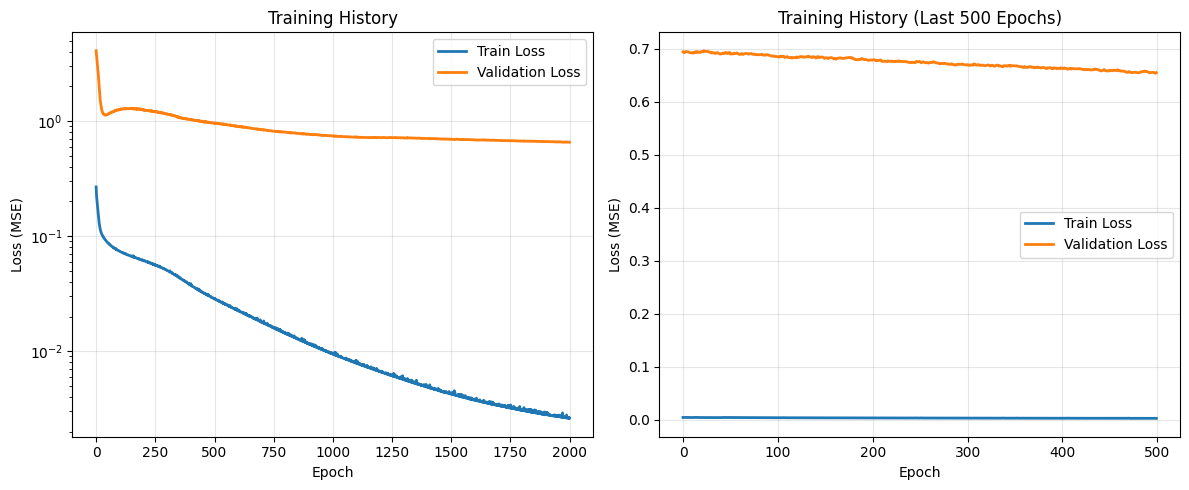

In [4]:
# Step 4: Configure and train the neural network

# ============================================================
# CONFIGURABLE PARAMETERS (Change these as needed)
# ============================================================
layer_sizes = [1, 64, 32, 16, 1]  # You can change this!
# Examples:
# [1, 32, 1] - 1 hidden layer with 32 neurons
# [1, 128, 64, 32, 1] - 3 hidden layers
# [1, 100, 50, 25, 10, 1] - 4 hidden layers

learning_rate = 0.001
epochs = 2000
batch_size = 32
# ============================================================

print("="*70)
print("TRAINING NEURAL NETWORK FROM SCRATCH")
print("="*70)
print(f"\nConfiguration:")
print(f"  Layer architecture: {layer_sizes}")
print(f"  Learning rate: {learning_rate}")
print(f"  Epochs: {epochs}")
print(f"  Batch size: {batch_size}\n")

# Initialize neural network
nn_scratch = NeuralNetworkFromScratch(
    layer_sizes=layer_sizes,
    learning_rate=learning_rate,
    random_seed=42
)

print("\nTraining started...\n")

# Train the network
train_losses, val_losses = nn_scratch.train(
    X_train, y_train,
    X_test, y_test,
    epochs=epochs,
    batch_size=batch_size,
    verbose=True
)

print("\n✓ Training completed!\n")

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss', linewidth=2)
plt.plot(val_losses, label='Validation Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training History')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.plot(train_losses[-500:], label='Train Loss', linewidth=2)
plt.plot(val_losses[-500:], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training History (Last 500 Epochs)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Step 5: Evaluate and Visualize Results from Scratch Model

SCRATCH MODEL EVALUATION

Training Set:
  MSE: 9823.23
  R² Score: 0.995925

Test Set:
  MSE: 2453811.83
  R² Score: -1.391783


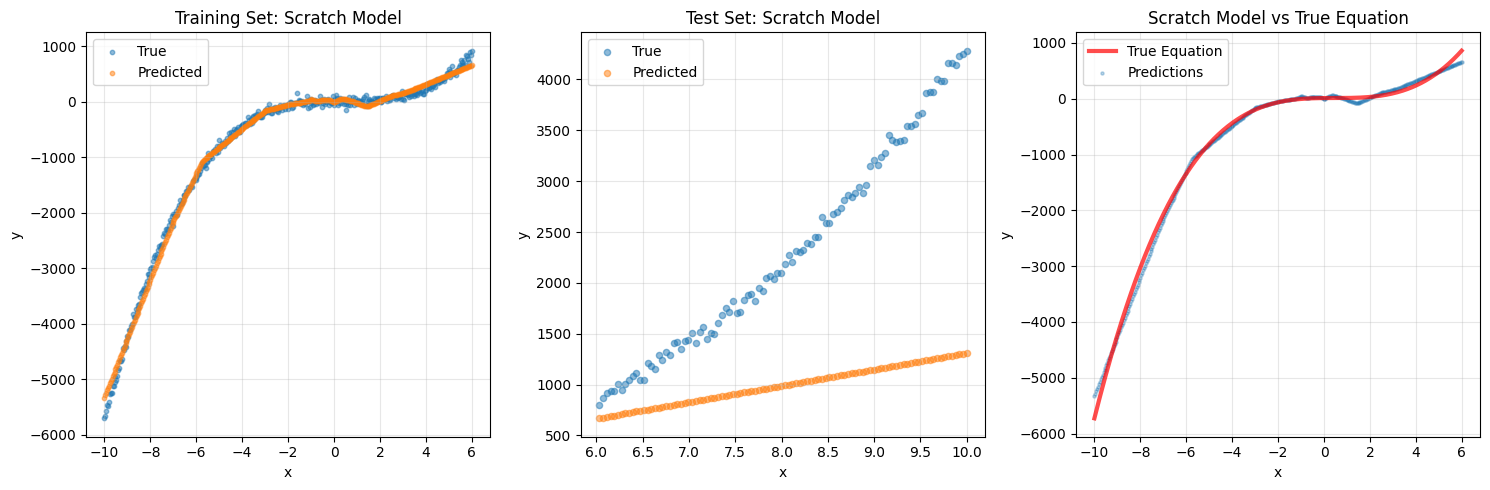

In [6]:
# Step 5: Evaluate the scratch model

# Make predictions
y_train_pred = nn_scratch.predict(X_train)
y_test_pred = nn_scratch.predict(X_test)

# Denormalize predictions back to original scale
y_train_pred_original = y_train_pred * y_std + y_mean
y_test_pred_original = y_test_pred * y_std + y_mean

y_train_original = y_train * y_std + y_mean
y_test_original = y_test * y_std + y_mean

X_train_original = X_train * X_std + X_mean
X_test_original = X_test * X_std + X_mean

# Calculate metrics
train_mse = np.mean((y_train_original - y_train_pred_original) ** 2)
test_mse = np.mean((y_test_original - y_test_pred_original) ** 2)
train_r2 = 1 - np.sum((y_train_original - y_train_pred_original)**2) / np.sum((y_train_original - y_train_original.mean())**2)
test_r2 = 1 - np.sum((y_test_original - y_test_pred_original)**2) / np.sum((y_test_original - y_test_original.mean())**2)

print("="*70)
print("SCRATCH MODEL EVALUATION")
print("="*70)
print(f"\nTraining Set:")
print(f"  MSE: {train_mse:.2f}")
print(f"  R² Score: {train_r2:.6f}")
print(f"\nTest Set:")
print(f"  MSE: {test_mse:.2f}")
print(f"  R² Score: {test_r2:.6f}")

# Visualize predictions
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 3, 1)
plt.scatter(X_train_original, y_train_original, alpha=0.5, s=10, label='True')
plt.scatter(X_train_original, y_train_pred_original, alpha=0.5, s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Set: Scratch Model')
plt.legend()
plt.grid(True, alpha=0.3)

# Test set
plt.subplot(1, 3, 2)
plt.scatter(X_test_original, y_test_original, alpha=0.5, s=20, label='True')
plt.scatter(X_test_original, y_test_pred_original, alpha=0.5, s=20, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Test Set: Scratch Model')
plt.legend()
plt.grid(True, alpha=0.3)

# Complete dataset with true equation
plt.subplot(1, 3, 3)
x_sorted = np.sort(X_train_original.flatten())
plt.plot(x_sorted, true_equation(x_sorted), 'r-', linewidth=3, label='True Equation', alpha=0.7)
plt.scatter(X_train_original, y_train_pred_original, alpha=0.3, s=5, label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scratch Model vs True Equation')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Step 6: Attempt to Extract Polynomial Coefficients (Symbolic Regression)

In [7]:
# Step 6: Try to recover the equation coefficients
# We'll create polynomial features and fit them to the neural network predictions

from numpy.linalg import lstsq

def extract_polynomial_coefficients(X_data, y_pred, degree=3):
    """
    Extract polynomial coefficients from neural network predictions
    using least squares polynomial fitting.
    """
    # Create polynomial features
    X_poly = np.column_stack([X_data**i for i in range(degree + 1)])
    
    # Solve for coefficients using least squares
    coeffs, residuals, rank, s = lstsq(X_poly, y_pred, rcond=None)
    
    return coeffs.flatten()

print("="*70)
print("POLYNOMIAL COEFFICIENT EXTRACTION (Scratch Model)")
print("="*70)

# Extract coefficients from scratch model predictions
X_full = np.concatenate([X_train_original, X_test_original])
y_pred_full = np.concatenate([y_train_pred_original, y_test_pred_original])

# Sort by x for better fitting
sort_idx = np.argsort(X_full.flatten())
X_sorted = X_full[sort_idx]
y_sorted = y_pred_full[sort_idx]

coefficients_scratch = extract_polynomial_coefficients(X_sorted, y_sorted, degree=3)

print("\nTrue equation: y = 5x³ - 7x² + 4x + 12")
print(f"\nExtracted coefficients (scratch model):")
print(f"  Constant (a₀): {coefficients_scratch[0]:.4f}  (True: 12)")
print(f"  Linear   (a₁): {coefficients_scratch[1]:.4f}  (True: 4)")
print(f"  Quadratic(a₂): {coefficients_scratch[2]:.4f}  (True: -7)")
print(f"  Cubic    (a₃): {coefficients_scratch[3]:.4f}  (True: 5)")

print(f"\nRecovered equation (scratch model):")
print(f"y = {coefficients_scratch[3]:.4f}x³ + {coefficients_scratch[2]:.4f}x² + {coefficients_scratch[1]:.4f}x + {coefficients_scratch[0]:.4f}")

# Calculate error between true and extracted coefficients
true_coeffs = np.array([12, 4, -7, 5])
coeff_error_scratch = np.abs(true_coeffs - coefficients_scratch)
print(f"\nCoefficient errors: {coeff_error_scratch}")
print(f"Mean absolute error: {np.mean(coeff_error_scratch):.4f}")


POLYNOMIAL COEFFICIENT EXTRACTION (Scratch Model)

True equation: y = 5x³ - 7x² + 4x + 12

Extracted coefficients (scratch model):
  Constant (a₀): 179.2238  (True: 12)
  Linear   (a₁): 56.4442  (True: 4)
  Quadratic(a₂): -20.0429  (True: -7)
  Cubic    (a₃): 2.9944  (True: 5)

Recovered equation (scratch model):
y = 2.9944x³ + -20.0429x² + 56.4442x + 179.2238

Coefficient errors: [167.22376132  52.44417695  13.04293716   2.00562558]
Mean absolute error: 58.6791


## Step 7: Build Neural Network using TensorFlow/Keras


In [8]:
# Step 7: Neural Network using TensorFlow/Keras

try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    
    print("✓ TensorFlow imported successfully!")
    print(f"  TensorFlow version: {tf.__version__}")
    
    # Suppress TensorFlow warnings
    tf.get_logger().setLevel('ERROR')
    
except ImportError:
    print("Installing TensorFlow...")
    import sys
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "tensorflow"])
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("\n" + "="*70)
print("BUILDING NEURAL NETWORK WITH KERAS")
print("="*70)

# Build model with similar architecture
def build_keras_model(layer_sizes, learning_rate=0.001):
    """Build a Keras model with specified architecture"""
    model = keras.Sequential()
    
    # Input layer
    model.add(layers.Input(shape=(layer_sizes[0],)))
    
    # Hidden layers
    for i in range(1, len(layer_sizes) - 1):
        model.add(layers.Dense(layer_sizes[i], activation='relu',
                              kernel_initializer='he_normal'))
    
    # Output layer (linear activation for regression)
    model.add(layers.Dense(layer_sizes[-1], activation='linear'))
    
    # Compile model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )
    
    return model

# Use same architecture as scratch model
keras_layer_sizes = layer_sizes.copy()

keras_model = build_keras_model(keras_layer_sizes, learning_rate=learning_rate)

print("\n✓ Keras model created!")
keras_model.summary()


Installing TensorFlow...

BUILDING NEURAL NETWORK WITH KERAS

✓ Keras model created!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

## Step 8: Train Keras Model



TRAINING KERAS MODEL

Epoch 376: early stopping
Restoring model weights from the end of the best epoch: 176.

✓ Keras model training completed!


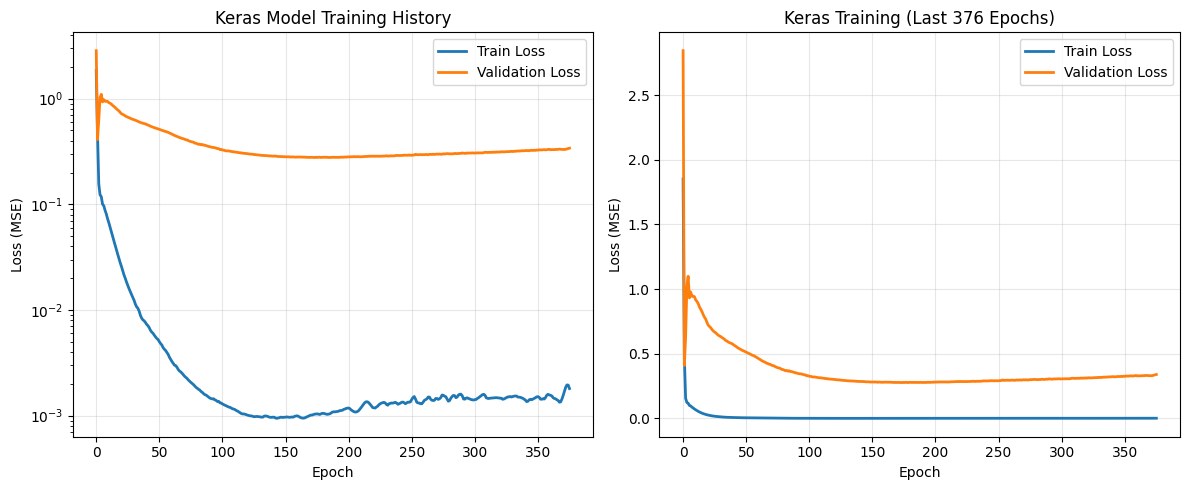

In [9]:
# Step 8: Train the Keras model

print("\n" + "="*70)
print("TRAINING KERAS MODEL")
print("="*70 + "\n")

# Early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=200,
    restore_best_weights=True,
    verbose=1
)

# Train the model
history = keras_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    verbose=0,
    callbacks=[early_stopping]
)

print("\n✓ Keras model training completed!")

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Keras Model Training History')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.subplot(1, 2, 2)
last_n = min(500, len(history.history['loss']))
plt.plot(history.history['loss'][-last_n:], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'][-last_n:], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title(f'Keras Training (Last {last_n} Epochs)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Step 9: Evaluate Keras Model

KERAS MODEL EVALUATION

Training Set:
  MSE: 4210.69
  R² Score: 0.998253

Test Set:
  MSE: 1039484.88
  R² Score: -0.013208


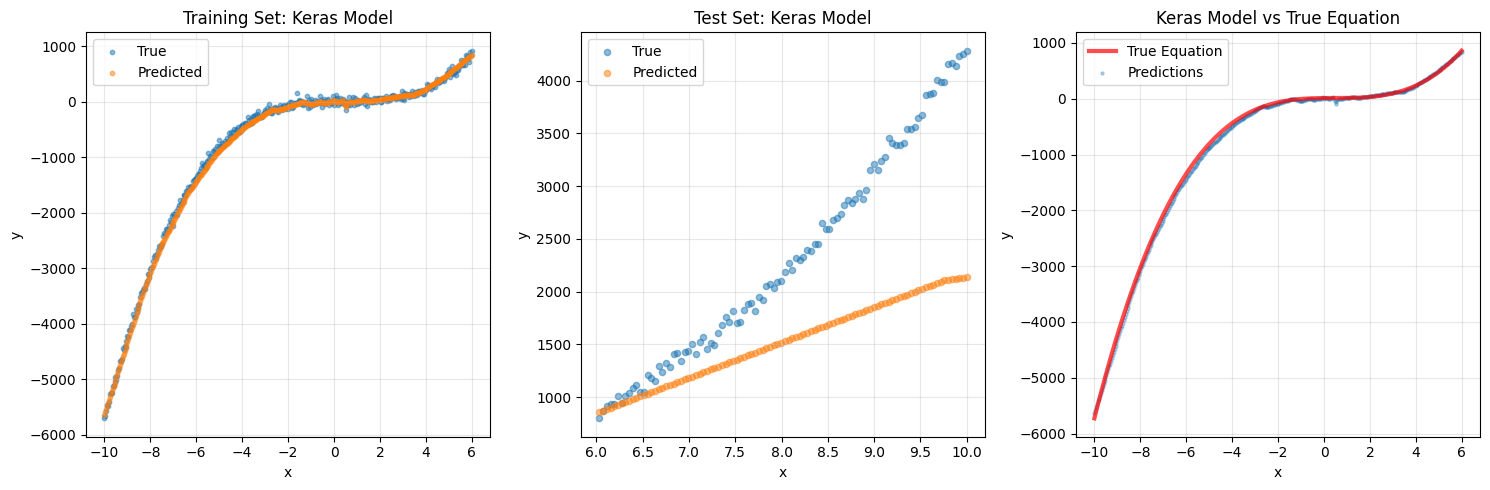

In [10]:
# Step 9: Evaluate Keras model

# Make predictions
y_train_pred_keras = keras_model.predict(X_train, verbose=0)
y_test_pred_keras = keras_model.predict(X_test, verbose=0)

# Denormalize predictions
y_train_pred_keras_original = y_train_pred_keras * y_std + y_mean
y_test_pred_keras_original = y_test_pred_keras * y_std + y_mean

# Calculate metrics
train_mse_keras = np.mean((y_train_original - y_train_pred_keras_original) ** 2)
test_mse_keras = np.mean((y_test_original - y_test_pred_keras_original) ** 2)
train_r2_keras = 1 - np.sum((y_train_original - y_train_pred_keras_original)**2) / np.sum((y_train_original - y_train_original.mean())**2)
test_r2_keras = 1 - np.sum((y_test_original - y_test_pred_keras_original)**2) / np.sum((y_test_original - y_test_original.mean())**2)

print("="*70)
print("KERAS MODEL EVALUATION")
print("="*70)
print(f"\nTraining Set:")
print(f"  MSE: {train_mse_keras:.2f}")
print(f"  R² Score: {train_r2_keras:.6f}")
print(f"\nTest Set:")
print(f"  MSE: {test_mse_keras:.2f}")
print(f"  R² Score: {test_r2_keras:.6f}")

# Visualize predictions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_train_original, y_train_original, alpha=0.5, s=10, label='True')
plt.scatter(X_train_original, y_train_pred_keras_original, alpha=0.5, s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Set: Keras Model')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.scatter(X_test_original, y_test_original, alpha=0.5, s=20, label='True')
plt.scatter(X_test_original, y_test_pred_keras_original, alpha=0.5, s=20, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Test Set: Keras Model')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
x_sorted = np.sort(X_train_original.flatten())
plt.plot(x_sorted, true_equation(x_sorted), 'r-', linewidth=3, label='True Equation', alpha=0.7)
plt.scatter(X_train_original, y_train_pred_keras_original, alpha=0.3, s=5, label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Keras Model vs True Equation')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Step 10: Extract Coefficients from Keras Model

In [11]:
# Step 10: Extract polynomial coefficients from Keras model

print("="*70)
print("POLYNOMIAL COEFFICIENT EXTRACTION (Keras Model)")
print("="*70)

# Get predictions from Keras model
y_pred_keras_full = keras_model.predict(
    np.concatenate([X_train, X_test]), verbose=0
)

# Denormalize
y_pred_keras_full_original = y_pred_keras_full * y_std + y_mean

# Sort by x
y_keras_sorted = y_pred_keras_full_original[sort_idx]

# Extract coefficients
coefficients_keras = extract_polynomial_coefficients(X_sorted, y_keras_sorted, degree=3)

print("\nTrue equation: y = 5x³ - 7x² + 4x + 12")
print(f"\nExtracted coefficients (Keras model):")
print(f"  Constant (a₀): {coefficients_keras[0]:.4f}  (True: 12)")
print(f"  Linear   (a₁): {coefficients_keras[1]:.4f}  (True: 4)")
print(f"  Quadratic(a₂): {coefficients_keras[2]:.4f}  (True: -7)")
print(f"  Cubic    (a₃): {coefficients_keras[3]:.4f}  (True: 5)")

print(f"\nRecovered equation (Keras model):")
print(f"y = {coefficients_keras[3]:.4f}x³ + {coefficients_keras[2]:.4f}x² + {coefficients_keras[1]:.4f}x + {coefficients_keras[0]:.4f}")

# Calculate error
coeff_error_keras = np.abs(true_coeffs - coefficients_keras)
print(f"\nCoefficient errors: {coeff_error_keras}")
print(f"Mean absolute error: {np.mean(coeff_error_keras):.4f}")


POLYNOMIAL COEFFICIENT EXTRACTION (Keras Model)

True equation: y = 5x³ - 7x² + 4x + 12

Extracted coefficients (Keras model):
  Constant (a₀): 113.6281  (True: 12)
  Linear   (a₁): 51.3002  (True: 4)
  Quadratic(a₂): -15.4934  (True: -7)
  Cubic    (a₃): 3.5841  (True: 5)

Recovered equation (Keras model):
y = 3.5841x³ + -15.4934x² + 51.3002x + 113.6281

Coefficient errors: [101.62808088  47.30022606   8.49339506   1.41593246]
Mean absolute error: 39.7094


## Step 11: Final Comparison


FINAL COMPARISON: SCRATCH vs KERAS vs TRUE EQUATION

** Performance Metrics **
   Metric  Scratch Model   Keras Model
Train MSE   9.823226e+03  4.210691e+03
 Test MSE   2.453812e+06  1.039485e+06
 Train R²   9.959249e-01  9.982532e-01
  Test R²  -1.391783e+00 -1.320810e-02

** Extracted Polynomial Coefficients **
   Coefficient  True Value  Scratch Model  Keras Model  Scratch Error  Keras Error
 a₀ (constant)          12     179.223761   113.628081     167.223761   101.628081
   a₁ (linear)           4      56.444177    51.300226      52.444177    47.300226
a₂ (quadratic)          -7     -20.042937   -15.493395      13.042937     8.493395
    a₃ (cubic)           5       2.994374     3.584068       2.005626     1.415932

** Recovered Equations **

True equation:
  y = 5.0000x³ - 7.0000x² + 4.0000x + 12.0000

Scratch model:
  y = 2.9944x³ + -20.0429x² + 56.4442x + 179.2238

Keras model:
  y = 3.5841x³ + -15.4934x² + 51.3002x + 113.6281


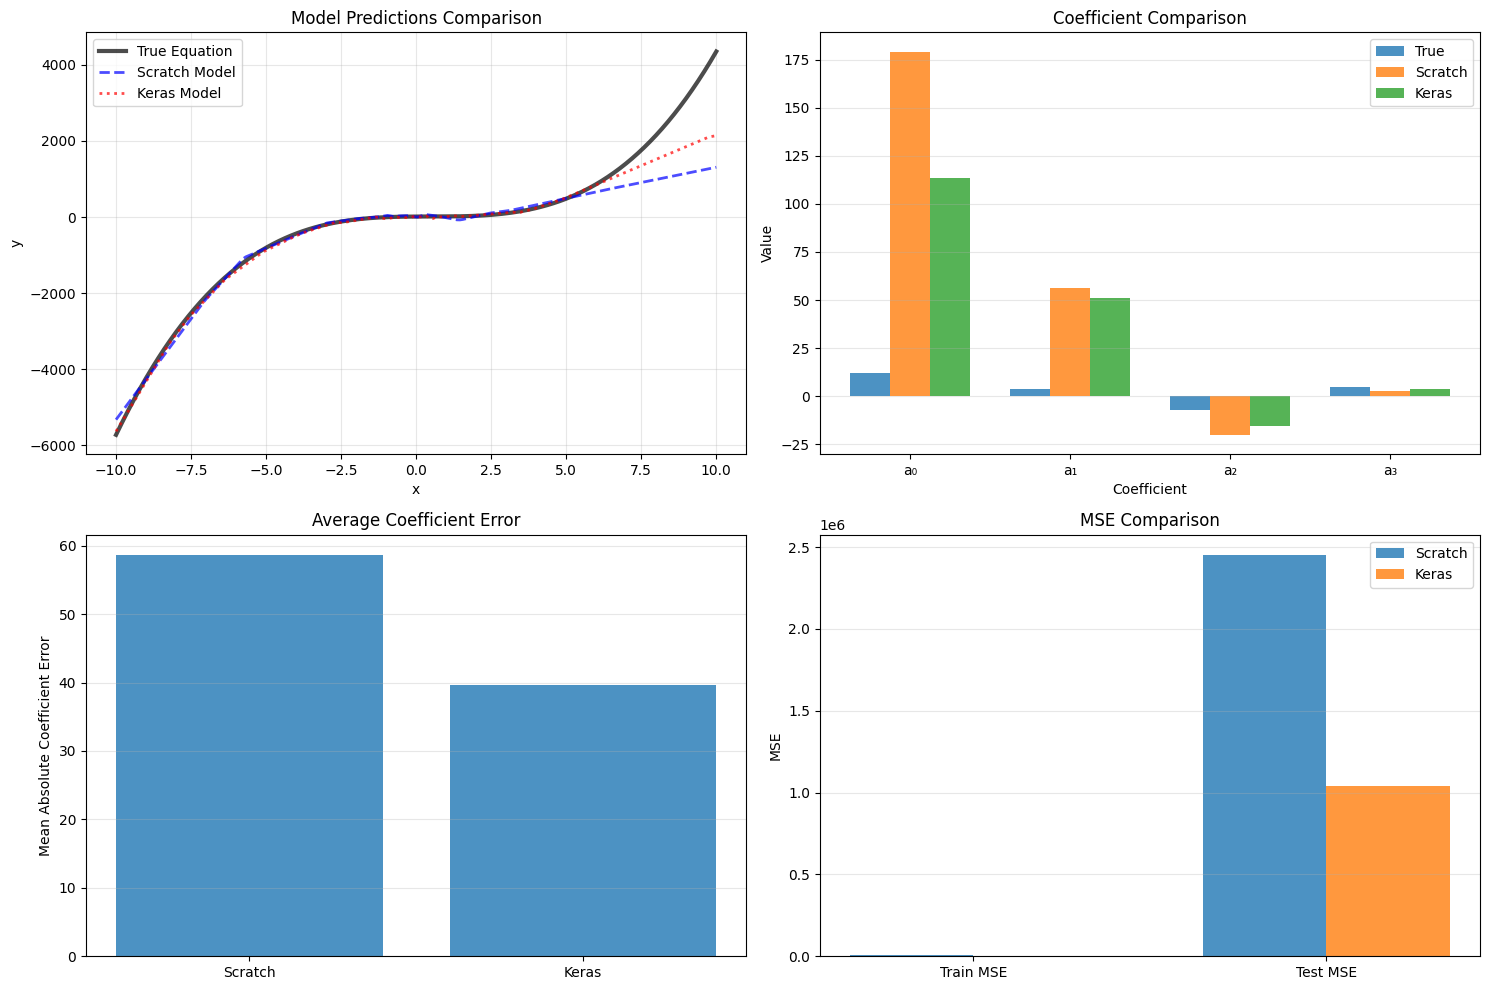


ANALYSIS COMPLETE!


In [12]:
# Step 11: Comprehensive comparison

print("\n" + "="*70)
print("FINAL COMPARISON: SCRATCH vs KERAS vs TRUE EQUATION")
print("="*70)

# Create comparison table
comparison_data = {
    'Metric': ['Train MSE', 'Test MSE', 'Train R²', 'Test R²'],
    'Scratch Model': [train_mse, test_mse, train_r2, test_r2],
    'Keras Model': [train_mse_keras, test_mse_keras, train_r2_keras, test_r2_keras]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n** Performance Metrics **")
print(comparison_df.to_string(index=False))

# Coefficient comparison
print("\n** Extracted Polynomial Coefficients **")
coeff_comparison = pd.DataFrame({
    'Coefficient': ['a₀ (constant)', 'a₁ (linear)', 'a₂ (quadratic)', 'a₃ (cubic)'],
    'True Value': true_coeffs,
    'Scratch Model': coefficients_scratch,
    'Keras Model': coefficients_keras,
    'Scratch Error': coeff_error_scratch,
    'Keras Error': coeff_error_keras
})
print(coeff_comparison.to_string(index=False))

print("\n** Recovered Equations **")
print(f"\nTrue equation:")
print(f"  y = 5.0000x³ - 7.0000x² + 4.0000x + 12.0000")
print(f"\nScratch model:")
print(f"  y = {coefficients_scratch[3]:.4f}x³ + {coefficients_scratch[2]:.4f}x² + {coefficients_scratch[1]:.4f}x + {coefficients_scratch[0]:.4f}")
print(f"\nKeras model:")
print(f"  y = {coefficients_keras[3]:.4f}x³ + {coefficients_keras[2]:.4f}x² + {coefficients_keras[1]:.4f}x + {coefficients_keras[0]:.4f}")

# Visual comparison
plt.figure(figsize=(15, 10))

# Plot 1: All predictions comparison
plt.subplot(2, 2, 1)
x_plot = np.linspace(-10, 10, 200).reshape(-1, 1)
x_plot_norm = (x_plot - X_mean) / X_std

y_true_plot = true_equation(x_plot)
y_scratch_plot = nn_scratch.predict(x_plot_norm) * y_std + y_mean
y_keras_plot = keras_model.predict(x_plot_norm, verbose=0) * y_std + y_mean

plt.plot(x_plot, y_true_plot, 'k-', linewidth=3, label='True Equation', alpha=0.7)
plt.plot(x_plot, y_scratch_plot, 'b--', linewidth=2, label='Scratch Model', alpha=0.7)
plt.plot(x_plot, y_keras_plot, 'r:', linewidth=2, label='Keras Model', alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model Predictions Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Coefficient comparison
plt.subplot(2, 2, 2)
x_pos = np.arange(4)
width = 0.25
plt.bar(x_pos - width, true_coeffs, width, label='True', alpha=0.8)
plt.bar(x_pos, coefficients_scratch, width, label='Scratch', alpha=0.8)
plt.bar(x_pos + width, coefficients_keras, width, label='Keras', alpha=0.8)
plt.xlabel('Coefficient')
plt.ylabel('Value')
plt.title('Coefficient Comparison')
plt.xticks(x_pos, ['a₀', 'a₁', 'a₂', 'a₃'])
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

# Plot 3: Error comparison
plt.subplot(2, 2, 3)
plt.bar(['Scratch', 'Keras'], [np.mean(coeff_error_scratch), np.mean(coeff_error_keras)], alpha=0.8)
plt.ylabel('Mean Absolute Coefficient Error')
plt.title('Average Coefficient Error')
plt.grid(True, alpha=0.3, axis='y')

# Plot 4: MSE comparison
plt.subplot(2, 2, 4)
x_labels = ['Train MSE', 'Test MSE']
scratch_mse = [train_mse, test_mse]
keras_mse = [train_mse_keras, test_mse_keras]

x_pos = np.arange(len(x_labels))
width = 0.35
plt.bar(x_pos - width/2, scratch_mse, width, label='Scratch', alpha=0.8)
plt.bar(x_pos + width/2, keras_mse, width, label='Keras', alpha=0.8)
plt.ylabel('MSE')
plt.title('MSE Comparison')
plt.xticks(x_pos, x_labels)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("ANALYSIS COMPLETE!")
print("="*70)


## Step 12: Save Results

In [13]:
# Step 12: Save all results to CSV

results_summary = {
    'Model': ['Scratch Neural Network', 'Keras Neural Network', 'True Equation'],
    'a0_constant': [coefficients_scratch[0], coefficients_keras[0], 12.0],
    'a1_linear': [coefficients_scratch[1], coefficients_keras[1], 4.0],
    'a2_quadratic': [coefficients_scratch[2], coefficients_keras[2], -7.0],
    'a3_cubic': [coefficients_scratch[3], coefficients_keras[3], 5.0],
    'Train_MSE': [train_mse, train_mse_keras, 0.0],
    'Test_MSE': [test_mse, test_mse_keras, 0.0],
    'Train_R2': [train_r2, train_r2_keras, 1.0],
    'Test_R2': [test_r2, test_r2_keras, 1.0]
}

results_df = pd.DataFrame(results_summary)
results_df.to_csv('neural_network_results.csv', index=False)

print("✓ Results saved to 'neural_network_results.csv'")
print("\nResults Summary:")
print(results_df.to_string(index=False))


✓ Results saved to 'neural_network_results.csv'

Results Summary:
                 Model  a0_constant  a1_linear  a2_quadratic  a3_cubic   Train_MSE     Test_MSE  Train_R2   Test_R2
Scratch Neural Network   179.223761  56.444177    -20.042937  2.994374 9823.226101 2.453812e+06  0.995925 -1.391783
  Keras Neural Network   113.628081  51.300226    -15.493395  3.584068 4210.691382 1.039485e+06  0.998253 -0.013208
         True Equation    12.000000   4.000000     -7.000000  5.000000    0.000000 0.000000e+00  1.000000  1.000000
